In [1]:
import json
import pandas as pd    
from IPython.display import JSON

data = list()

for i in range(3,4):
    filename = "data_" + str(i) + ".json"
    # Opening JSON file
    f = open(filename)

    # returns JSON object as 
    # a dictionary
    data_json = json.load(f)
    print(len(data_json))
    data += data_json

    f.close()

1994


In [3]:
df = pd.json_normalize(data)
df = df['ClaimBucket.claimIssue.description']
df.name = "description"

In [4]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

fdist = FreqDist()

stop_words = set(stopwords.words('turkish'))

for text in df:
    word_tokens = word_tokenize(text.lower())
    
    filtered_sentence = []
    
    for w in word_tokens:
        if w not in stop_words and w.isalnum():
            filtered_sentence.append(w)
            
    fdist += FreqDist(word.lower() for word in filtered_sentence)

In [6]:
print("max occured word: ", fdist.max())

max occured word:  iadesi


In [7]:
print("total word count: ", fdist.N())
print("unique word count: ", fdist.B())

total word count:  15046
unique word count:  217


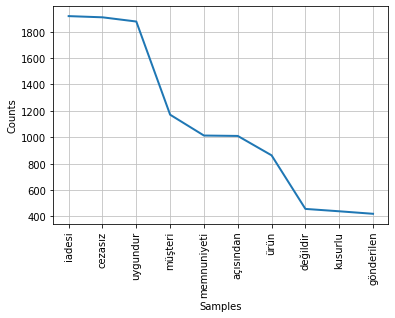

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [8]:
fdist.plot(10)